<a href="https://colab.research.google.com/github/captmmari/Moringa-Week-9-Simon-Mmari/blob/main/Simon_Mmari_Independent_project_Naive_Bayes_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Defining the question.**






**Specifying the analysis question.**


To utilize Naive Bayes Estimator Machine Learning Technique in developing a spam email filter.

#**Metrics for Success.**


1.Identify which measurements are most important in predicting whether an email 
is spam or not. 

2.A high accuracy of 80% and above

#**Importing Libraries.**

In [1]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import decomposition
from imblearn.over_sampling import RandomOverSampler
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier

#**Reading the data.**

In [2]:
df = pd.read_csv('spambase.data')
df.sample(10)


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4301,0.00,0.82,0.00,0.0,0.00,0.00,0.0,0.00,0.00,1.24,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,1.65,0.0,0.00,9.95,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,4.149,0.000,0.0,0.070,0.000,0.562,7.416,43,356,0
447,0.12,0.12,0.24,0.0,1.34,0.12,0.0,0.12,0.00,0.00,0.36,0.85,0.0,0.0,0.0,0.24,0.24,0.0,2.33,0.0,0.73,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.98,0.00,0.0,0.00,0.12,0.0,0.0,0.00,0.00,0.12,0.0,0.0,0.0,0.061,0.020,0.0,0.041,0.041,0.000,2.351,69,254,1
2904,0.00,0.00,0.00,0.0,1.11,0.00,0.0,0.55,0.00,3.91,0.00,0.00,0.0,0.0,0.0,0.55,0.00,0.0,1.67,0.0,2.23,0.00,0.00,0.00,0.55,0.55,0.0,0.0,0.00,2.79,0.0,0.0,0.00,0.0,0.0,0.00,0.55,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.085,0.000,0.000,1.142,5,48,0
2360,0.00,0.00,2.43,0.0,0.00,0.00,0.0,0.00,0.27,0.00,0.00,2.16,0.0,0.0,0.0,0.00,0.00,0.0,0.27,0.0,1.62,0.00,0.00,0.00,0.27,0.54,0.0,0.0,0.27,0.00,0.0,0.0,0.27,0.0,0.0,0.00,0.00,0.0,0.00,0.27,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.344,0.0,0.000,0.000,0.000,2.319,12,167,0
1886,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.000,0.0,1.886,0.000,0.000,1.375,4,11,0
618,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,3.37,0.0,0.00,0.00,2.24,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.218,0.000,0.000,1.827,11,53,1
4455,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,3.12,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,3.12,3.12,0.0,0.0,0.0,0.000,0.000,0.0,0.467,0.000,0.000,1.000,1,5,0
2340,0.00,0.00,0.73,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.47,0.0,0.0,0.0,0.00,0.00,0.0,1.47,0.0,0.73,0.00,0.00,0.00,0.00,0.73,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,1.47,0.00,0.00,0.0,0.0,0.0,0.000,0.238,0.0,0.000,0.000,0.000,1.827,5,53,0
1438,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.42,0.00,0.42,0.42,0.00,0.0,0.0,0.0,0.00,0.00,0.0,2.52,0.0,2.94,0.00,0.00,0.42,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.84,0.0,0.0,0.0,0.000,0.129,0.0,0.129,0.194,0.000,1.859,20,119,1
1820,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,7.31,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,4.87,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.393,0.000,0.000,1.750,7,28,0


#**Checking the data.**

In [3]:
# Determining the no. of records in our dataset
#
df.shape[0]
#The data has 4,600 rows

4600

In [4]:
# Previewing the top of our dataset
#
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
# Previewing the bottom of our dataset
# 
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

In [7]:
#Introducing headers for the columns
headers = ["a","b","c","d", "e","f",
         "g","h","i", "j","k","l","m","n", "o","p",
         "q","r","s", "t","u","v","w","x", "y","z",
         "a1","b1","c1", "d1","e1","f1","g1","h1", "i1","j1",
         "k1","l1","m1", "n1","o1","p1","q1","r1", "s1","t1",
         "u1","v1","w1", "x1","y1","z1","a2","b2", "c2","d2",
         "e2","spam"]

In [8]:
#Using the above headers as column names
df.columns = headers

#**Tidying the data.**

Text(0.5, 1.0, 'Boxplots')

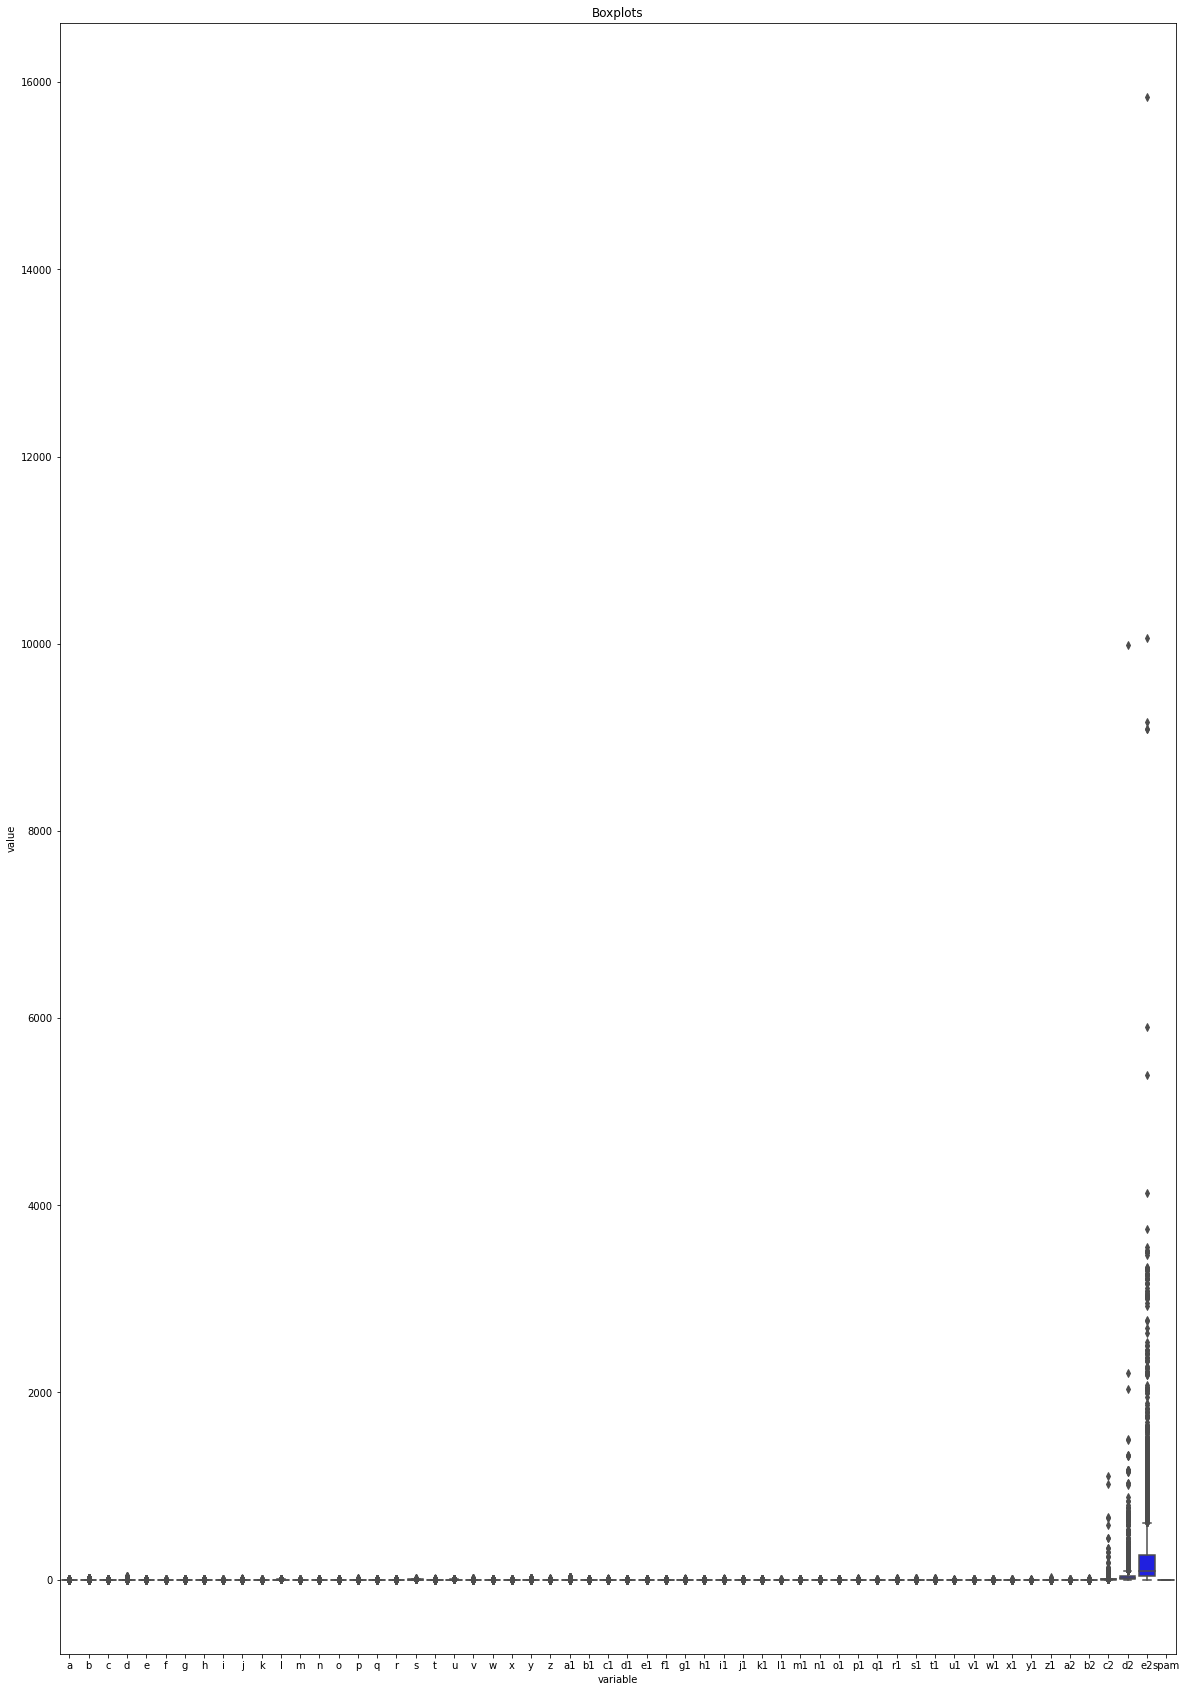

In [9]:

# Checking for Outliers
#
import seaborn as sns
import matplotlib.pyplot as plt

boxplot = pd.DataFrame(data = df)

plt.figure(figsize=(20,30))

sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')
#Column e2 has the highest number of outliers

In [10]:
df.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a1', 'b1',
       'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'i1', 'j1', 'k1', 'l1', 'm1', 'n1',
       'o1', 'p1', 'q1', 'r1', 's1', 't1', 'u1', 'v1', 'w1', 'x1', 'y1', 'z1',
       'a2', 'b2', 'c2', 'd2', 'e2', 'spam'],
      dtype='object')

In [11]:
# Checking for Anomalies
#
Q1= df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

a        0.000
b        0.000
c        0.000
d        0.000
e        0.000
f        0.000
g        0.000
h        0.000
i        0.000
j        0.000
k        0.000
l        0.000
m        0.000
n        0.000
o        0.000
p        0.000
q        0.000
r        0.000
s        0.000
t        0.000
u        0.000
v        0.000
w        0.000
x        0.000
y        0.000
z        0.000
a1       0.000
b1       0.000
c1       0.000
d1       0.000
e1       0.000
f1       0.000
g1       0.000
h1       0.000
i1       0.000
j1       0.000
k1       0.000
l1       0.000
m1       0.000
n1       0.000
o1       0.000
p1       0.000
q1       0.000
r1       0.000
s1       0.000
t1       0.000
u1       0.000
v1       0.000
w1       0.000
x1       0.000
y1       0.000
z1       0.000
a2       0.000
b2       0.000
c2       1.588
d2       6.000
e2      35.000
spam     0.000
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

a         0.00000
b         0.00000
c         0.42000
d         0.00000
e         0.38250
f         0.00000
g         0.00000
h         0.00000
i         0.00000
j         0.16000
k         0.00000
l         0.80000
m         0.00000
n         0.00000
o         0.00000
p         0.10000
q         0.00000
r         0.00000
s         2.64000
t         0.00000
u         1.27000
v         0.00000
w         0.00000
x         0.00000
y         0.00000
z         0.00000
a1        0.00000
b1        0.00000
c1        0.00000
d1        0.00000
e1        0.00000
f1        0.00000
g1        0.00000
h1        0.00000
i1        0.00000
j1        0.00000
k1        0.00000
l1        0.00000
m1        0.00000
n1        0.00000
o1        0.00000
p1        0.00000
q1        0.00000
r1        0.00000
s1        0.11000
t1        0.00000
u1        0.00000
v1        0.00000
w1        0.00000
x1        0.18800
y1        0.00000
z1        0.31425
a2        0.05200
b2        0.00000
c2        3.70525
d2       4

'0.5 quartile'

a         0.00000
b         0.00000
c         0.42000
d         0.00000
e         0.38250
f         0.00000
g         0.00000
h         0.00000
i         0.00000
j         0.16000
k         0.00000
l         0.80000
m         0.00000
n         0.00000
o         0.00000
p         0.10000
q         0.00000
r         0.00000
s         2.64000
t         0.00000
u         1.27000
v         0.00000
w         0.00000
x         0.00000
y         0.00000
z         0.00000
a1        0.00000
b1        0.00000
c1        0.00000
d1        0.00000
e1        0.00000
f1        0.00000
g1        0.00000
h1        0.00000
i1        0.00000
j1        0.00000
k1        0.00000
l1        0.00000
m1        0.00000
n1        0.00000
o1        0.00000
p1        0.00000
q1        0.00000
r1        0.00000
s1        0.11000
t1        0.00000
u1        0.00000
v1        0.00000
w1        0.00000
x1        0.18800
y1        0.00000
z1        0.31425
a2        0.05200
b2        0.00000
c2        2.11725
d2       3

In [12]:
# Check for missing values 
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
#There are no missing values

a       0.0
r1      0.0
f1      0.0
g1      0.0
h1      0.0
i1      0.0
j1      0.0
k1      0.0
l1      0.0
m1      0.0
n1      0.0
o1      0.0
p1      0.0
q1      0.0
s1      0.0
b       0.0
t1      0.0
u1      0.0
v1      0.0
w1      0.0
x1      0.0
y1      0.0
z1      0.0
a2      0.0
b2      0.0
c2      0.0
d2      0.0
e2      0.0
e1      0.0
d1      0.0
c1      0.0
b1      0.0
c       0.0
d       0.0
e       0.0
f       0.0
g       0.0
h       0.0
i       0.0
j       0.0
k       0.0
l       0.0
m       0.0
n       0.0
o       0.0
p       0.0
q       0.0
r       0.0
s       0.0
t       0.0
u       0.0
v       0.0
w       0.0
x       0.0
y       0.0
z       0.0
a1      0.0
spam    0.0
dtype: float64

#**Exploratory Data Analysis.**

In [13]:
#Ratio of spam vs non-spam emails
import plotly.express as px
fig = px.histogram(df, x="spam", y="a", color="spam", width=600)
fig.show()

In [14]:
#Checking for correlation among variables
df.corr()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1,m1,n1,o1,p1,q1,r1,s1,t1,u1,v1,w1,x1,y1,z1,a2,b2,c2,d2,e2,spam
a,1.000000,-0.016735,0.065684,0.013270,0.023120,0.059650,0.007647,-0.003970,0.106241,0.041171,0.188441,0.105811,0.066416,0.036768,0.028425,0.059393,0.081906,0.053504,0.128256,0.021282,0.197061,-0.024358,0.134053,0.188143,-0.072530,-0.061710,-0.066443,-0.048698,-0.041264,-0.052817,-0.039079,-0.032069,-0.041028,-0.027701,-0.044969,-0.054692,-0.057338,-0.007965,-0.011148,-0.036110,-0.009712,-0.026083,-0.024308,-0.022126,-0.037128,-0.034071,-0.000958,-0.017763,-0.026517,-0.021235,-0.033313,0.058342,0.117398,-0.008852,0.044488,0.061387,0.089165,0.126323
b,-0.016735,1.000000,-0.033579,-0.006920,-0.023761,-0.024815,0.003939,-0.016261,-0.003803,0.032989,-0.006843,-0.040406,-0.018836,-0.009194,0.005344,-0.009123,-0.018348,0.033366,-0.055488,-0.015794,-0.018200,-0.008841,-0.020481,0.001999,-0.043461,-0.038191,-0.030291,-0.029205,-0.021928,-0.027492,-0.018086,-0.003316,-0.024891,-0.004292,-0.024044,-0.028181,-0.023990,-0.008918,-0.019111,-0.014808,-0.015411,-0.025165,-0.002355,-0.019730,-0.016397,-0.023844,-0.009813,-0.015739,-0.007270,-0.049802,-0.018516,-0.014506,-0.009584,0.001953,0.002086,0.000268,-0.022679,-0.030318
c,0.065684,-0.033579,1.000000,-0.020240,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,0.048304,0.083197,0.047644,0.008580,0.122150,0.063896,0.036314,0.121665,0.139314,0.031139,0.156641,-0.035665,0.123724,0.041181,-0.087879,-0.062417,-0.108857,-0.050615,-0.057703,-0.032514,-0.038905,-0.061852,-0.054735,-0.061687,-0.048307,-0.046469,-0.066970,0.032418,-0.014782,-0.047040,-0.030939,-0.005784,-0.044296,-0.053448,-0.050621,-0.056628,0.029351,-0.026328,-0.033190,-0.016417,-0.033098,0.108054,0.087671,-0.003320,0.097410,0.107462,0.070119,0.196840
d,0.013270,-0.006920,-0.020240,1.000000,0.003238,-0.010018,0.019781,0.010265,-0.002458,-0.004951,-0.012980,-0.019220,-0.013203,0.012006,0.002705,0.007433,0.003467,0.019422,-0.010832,-0.005383,0.008177,0.028101,0.011365,0.035358,-0.015185,-0.013711,-0.010687,-0.010370,-0.007799,-0.010478,-0.007531,-0.006718,-0.008077,-0.006730,-0.006124,-0.006517,-0.007765,-0.002669,-0.004604,-0.007645,-0.005672,-0.008097,-0.009270,-0.005935,-0.012960,-0.009183,-0.003349,-0.001925,-0.000592,-0.012376,-0.007150,-0.003132,0.010859,-0.000299,0.005260,0.022081,0.021369,0.057394
e,0.023120,-0.023761,0.077737,0.003238,1.000000,0.054055,0.147338,0.029599,0.020824,0.034497,0.068383,0.066788,0.031127,0.003446,0.056177,0.083024,0.143446,0.062368,0.098510,0.031527,0.136605,-0.020207,0.070039,0.000040,-0.072502,-0.075456,-0.088011,-0.061500,0.032048,-0.052066,-0.042535,-0.026748,-0.031997,-0.026960,-0.049731,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115042,-0.048878,0.015234,-0.042336,-0.077985,-0.026900,-0.032005,-0.032759,-0.046361,-0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492,0.241958
f,0.059650,-0.024815,0.087624,-0.010018,0.054055,1.000000,0.061142,0.079543,0.117416,0.013869,0.053878,0.009272,0.077609,0.009660,0.173055,0.019872,0.064114,0.078547,0.095518,0.058967,0.106844,0.007948,0.211437,0.059314,-0.084430,-0.087296,-0.069070,-0.066242,-0.048686,-0.048145,-0.046396,-0.036847,-0.034178,-0.037327,-0.054331,-0.052838,-0.057491,-0.017923,-0.047633,-0.029880,-0.029466,-0.054826,-0.030632,-0.028837,-0.053661,-0.033061,-0.014349,-0.031702,-0.019131,-0.008745,-0.015145,0.065094,0.105671,0.019887,-0.010282,0.090177,0.082089,0.232741
g,0.007647,0.003939,0.036725,0.019781,0.147338,0.061142,1.000000,0.044530,0.050767,0.056787,0.159562,-0.001454,0.013276,-0.022734,0.042892,0.128442,0.187965,0.122202,0.111803,0.046124,0.130804,-0.002101,0.064778,0.030562,-0.089517,-0.080350,-0.065908,-0.066962,-0.048493,-0.058116,-0.046290,-0.040548,-0.041384,-0.040920,-0.053215,-0.053995,-0.052057,-0.014785,-0.046990,-0.022133,-0.033128,-0.049675,-0.049093,-0.034469,-0.050831,-0.056179,-0.017517,-0.031415,-0.033099,-0.051919,-0.027663,0.053748,0.

#**Implementing the model.**

In [15]:
from sklearn.model_selection import train_test_split as tts
# Splitting the dataset x and y..
X = df.iloc[:,:57]
# .values.reshape(-1,1)
y = df.iloc[:,-1]

# Split data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

In [16]:
 #Scaling our data
from sklearn.preprocessing import StandardScaler
mscaler = StandardScaler()
mscaler.fit(X_train)

X_train = mscaler.transform(X_train)
X_test = mscaler.transform(X_test)

**Gaussian Model**

1.Base Model

In [17]:
# Fitting the model
model = GaussianNB()  
model.fit(X_train, y_train)

GaussianNB()

In [18]:
# Making predictions
predicted = model.predict(X_test)

In [19]:
# Accuracy
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
print(roc_auc_score(y_test, predicted))
#The ROC score is at 85.03%

[[391 147]
 [ 10 372]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       538
           1       0.72      0.97      0.83       382

    accuracy                           0.83       920
   macro avg       0.85      0.85      0.83       920
weighted avg       0.87      0.83      0.83       920

0.8502938943926506


The ROC score is at 85.03%

2. Testing with 0.1 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=6) 

In [21]:
# Fitting the model
model7 = GaussianNB()  
model7.fit(X_train, y_train)

GaussianNB()

In [22]:
# Making predictions
predicted7= model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but GaussianNB was fitted without feature names



In [23]:
print(confusion_matrix(y_test, predicted7))
print(classification_report(y_test, predicted7))
print(roc_auc_score(y_test, predicted7))

[[ 92 184]
 [  2 182]]
              precision    recall  f1-score   support

           0       0.98      0.33      0.50       276
           1       0.50      0.99      0.66       184

    accuracy                           0.60       460
   macro avg       0.74      0.66      0.58       460
weighted avg       0.79      0.60      0.56       460

0.661231884057971


The ROC records a drastic drop of 66.12%

3.Testing with 0.2

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [25]:
# Fitting the model
model8 = GaussianNB()  
model8.fit(X_train, y_train)

GaussianNB()

In [26]:
# Making predictions
predicted8 = model8.predict(X_test)

In [27]:
print(confusion_matrix(y_test, predicted8))
print(classification_report(y_test, predicted8))
print(roc_auc_score(y_test, predicted8))

[[406 147]
 [ 18 349]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       553
           1       0.70      0.95      0.81       367

    accuracy                           0.82       920
   macro avg       0.83      0.84      0.82       920
weighted avg       0.86      0.82      0.82       920

0.8425654468319939


The ROC rises to 84.26%

**Bernoulli Model**

1.Base Model

In [28]:
from sklearn.naive_bayes import BernoulliNB
model1 = BernoulliNB()
model1.fit(X_train,y_train)

BernoulliNB()

In [29]:
#Making predictions
predicted1 = model1.predict(X_test)

In [30]:
#Checking performance our model.
print(confusion_matrix(y_test, predicted1))
print(classification_report(y_test, predicted1))
print(roc_auc_score(y_test, predicted1))

[[510  43]
 [ 62 305]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       553
           1       0.88      0.83      0.85       367

    accuracy                           0.89       920
   macro avg       0.88      0.88      0.88       920
weighted avg       0.89      0.89      0.89       920

0.8766524924735527


The ROC score 89.21%

2. Using 0.5 test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=6) 
model5 = BernoulliNB()
model5.fit(X_train,y_train)

BernoulliNB()

In [32]:
#Making predictions
predicted5 = model5.predict(X_test)

In [33]:
#Checking performance our model.
print(confusion_matrix(y_test, predicted5))
print(classification_report(y_test, predicted5))
print(roc_auc_score(y_test, predicted5))

[[1266  102]
 [ 160  772]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1368
           1       0.88      0.83      0.85       932

    accuracy                           0.89      2300
   macro avg       0.89      0.88      0.88      2300
weighted avg       0.89      0.89      0.89      2300

0.8768823883743695


The ROC is 87.69%

3.Using a 0.6 test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=6) 
model6 = BernoulliNB()
model6.fit(X_train,y_train)

BernoulliNB()

In [35]:
#Making predictions
predicted6 = model6.predict(X_test)

In [36]:
#Checking performance our model.
print(confusion_matrix(y_test, predicted6))
print(classification_report(y_test, predicted6))
print(roc_auc_score(y_test, predicted6))

[[1522  126]
 [ 195  917]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1648
           1       0.88      0.82      0.85      1112

    accuracy                           0.88      2760
   macro avg       0.88      0.87      0.88      2760
weighted avg       0.88      0.88      0.88      2760

0.8740919885450862


The ROC drops to 87.41%

**Multinomial model**

1.Base Model

In [37]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB().fit(X_train,y_train)

In [38]:
predicted2= model2.predict(X_test)

In [39]:
print(confusion_matrix(y_test, predicted2))
print(classification_report(y_test, predicted2))
print(roc_auc_score(y_test, predicted2))

[[1416  232]
 [ 390  722]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1648
           1       0.76      0.65      0.70      1112

    accuracy                           0.77      2760
   macro avg       0.77      0.75      0.76      2760
weighted avg       0.77      0.77      0.77      2760

0.7542519382552211


The ROC Score 77.89%

2. Using a 0.4 test

In [40]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [41]:
model3 = MultinomialNB().fit(X_train, y_train)

In [42]:
#Evaluating the Mod, we can evaluate its performance in the testing set
predicted3 = model3.predict(X_test)


In [43]:
print(confusion_matrix(y_test, predicted3))
print(classification_report(y_test, predicted3))
print(roc_auc_score(y_test, predicted3))

[[941 164]
 [216 519]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1105
           1       0.76      0.71      0.73       735

    accuracy                           0.79      1840
   macro avg       0.79      0.78      0.78      1840
weighted avg       0.79      0.79      0.79      1840

0.7788530796934159


The ROC Score remains constant at 77.89%

3.Using a test of 0.2

In [44]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [45]:
model4 = MultinomialNB().fit(X_train, y_train)

In [46]:
#Predicting
predicted4 = model4.predict(X_test)

In [47]:
print(confusion_matrix(y_test, predicted4))
print(classification_report(y_test, predicted4))
print(roc_auc_score(y_test, predicted4))

[[471  82]
 [116 251]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       553
           1       0.75      0.68      0.72       367

    accuracy                           0.78       920
   macro avg       0.78      0.77      0.77       920
weighted avg       0.78      0.78      0.78       920

0.7678208040364423


The ROC drops to 76.78%

#**Challenging the solution.**

Naive Bayes estimator is sensitive to correlations in the data hence our first step will be to deal with correlations,then normalize our dataset to see if this improves the ROC score.

In [68]:
#Conducting Random sampling
new = RandomOverSampler()
X_new, y_new = new.fit_resample(X, y)

#Normalizing attributes
from sklearn import preprocessing
X_new = preprocessing.normalize(X)
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

ValueError: ignored

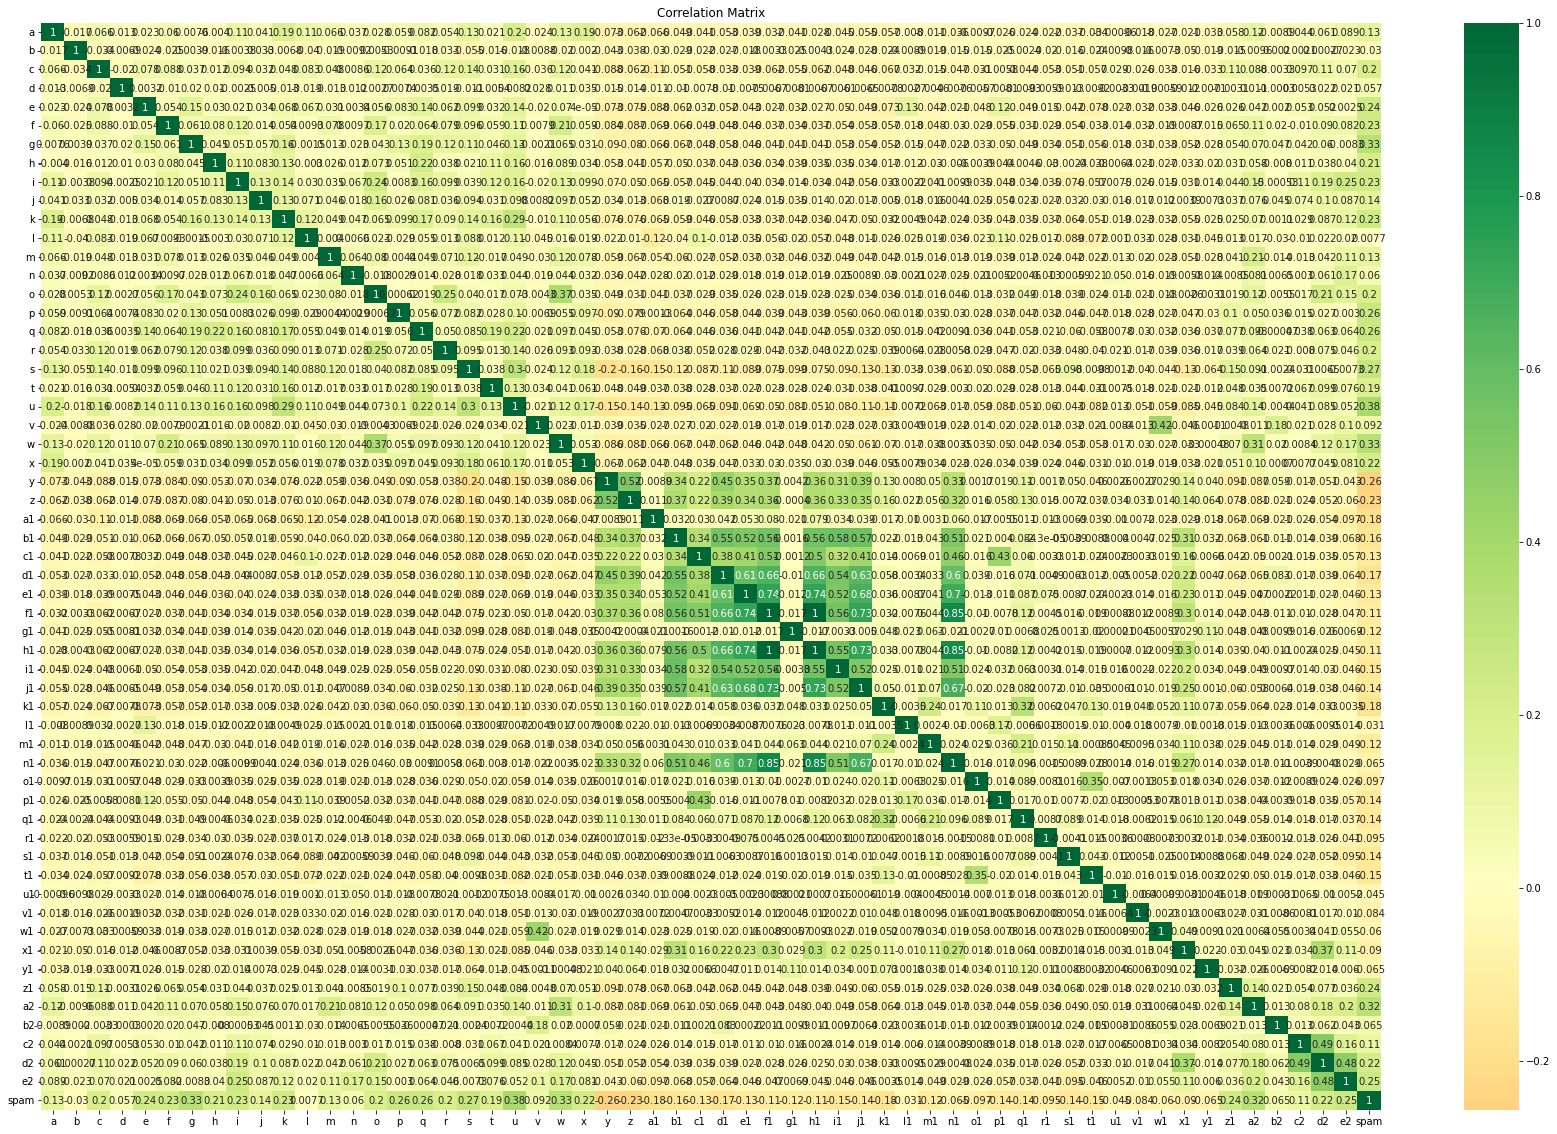

In [58]:
#Dealing correlated features
C_M = df.corr()
plt.figure(figsize = (30, 20))
sns.heatmap(C_M, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlation Matrix')
plt.show()

In [59]:
#Dropping some of the correlated values
df1 = df.drop([ 'x', 'y', 'z', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'i1'],axis=1)
df1


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,j1,k1,l1,m1,n1,o1,p1,q1,r1,s1,t1,u1,v1,w1,x1,y1,z1,a2,b2,c2,d2,e2,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [60]:
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_new, test_size=0.2, random_state=0)
#X_train.shape, y_train.shape
#Training and fitting the model
GNB = GaussianNB()
GNB.fit(X1_train,y1_train)
predicted9 = GNB.predict(X1_test)
print(accuracy_score(y1_test,predicted9))
#Checking performance our model with confusion matrix.
print(confusion_matrix(y1_test, predicted9))
print(classification_report(y1_test, predicted9))
print(roc_auc_score(y2_test, predicted9))


NameError: ignored

Method 2:xgboost

In [50]:
# Fitting our model 
Model11 = XGBClassifier(n_estimators = 100, learning_rate = 0.25)
Model11.fit(X_test, y_test)

XGBClassifier(learning_rate=0.25)

In [51]:
# Getting Feature Importance

print(Model11.feature_importances_)
importance = pd.DataFrame({'feature':X.columns,'importance':np.round(Model11.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')
print(importance)


[0.00643301 0.00845828 0.00800722 0.         0.04050341 0.01194765
 0.07312509 0.01645011 0.         0.01054422 0.00395683 0.00604181
 0.         0.01452238 0.         0.06495082 0.01667199 0.00311101
 0.00636987 0.006935   0.0553917  0.         0.02664717 0.03174994
 0.04293204 0.01319209 0.03823028 0.         0.         0.
 0.         0.         0.00348391 0.         0.01036691 0.01018714
 0.02342852 0.         0.01788297 0.         0.         0.00704717
 0.         0.00502922 0.01125902 0.02190582 0.         0.
 0.01030213 0.0070084  0.         0.11974391 0.18729055 0.
 0.02619464 0.02027199 0.01242579]
         importance
feature            
a2            0.187
z1            0.120
g             0.073
p             0.065
u             0.055
y             0.043
e             0.041
a1            0.038
x             0.032
w             0.027
c2            0.026
k1            0.023
t1            0.022
d2            0.020
m1            0.018
q             0.017
h             0.016
n     

In [52]:
# making predictions for test data

predicted11 = Model11.predict(X_test)
predicting = [round(value) for value in predicted11]


In [53]:
# Accuracy
print(Model11.score(X_test, y_test) * 100)
#The accuracy is at 99.35%

99.34782608695653


Given the high accuracy we will go ahead to fit the model with the top 10 most important features to see if it improves the model.

In [54]:
#Splitting the data
X0 = df[["a2","z1","g","p","u","y","e","a1","x","w"]].values
y0 = df["spam"].values

In [55]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.4, random_state=6) 

In [56]:
#Fitting the model
model12 = GaussianNB() 
model12.fit(X0_train, y0_train)
# Predicting
predicted12 = model12.predict(X0_test)

In [57]:
print(confusion_matrix(y0_test, predicted12))
print(classification_report(y0_test, predicted12))
print(roc_auc_score(y0_test, predicted12))

[[998 107]
 [103 632]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1105
           1       0.86      0.86      0.86       735

    accuracy                           0.89      1840
   macro avg       0.88      0.88      0.88      1840
weighted avg       0.89      0.89      0.89      1840

0.8815156831963554


The ROC records an increase,an indication that xgboost has improved the Gaussian model.

#**Conclusion.**


One of the key cybersecurity issue is the spam emails sent to unsuspecting individuals.There is therefore need to invest a way of filtering spam and non-spam emails in order to data manipulation and any other consequences.To ensure that this stops, the Naive Bayes has indicated its potential to filter this as informed by the high AUC scores thus it should be implemented in organizations and individuals.